In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
words = open("names.txt", "r").read().lower().splitlines()
lex = [".","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

In [55]:
def to_num(char):
    return lex.index(char)

In [80]:
xs, ys = [],[]

for w in words[0:1]:
    chars = list(w) + ["."]
    
    for c1, c2 in zip(chars, chars[1:]):
        xs.append(to_num(c1))
        ys.append(to_num(c2))
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

xenc = torch.nn.functional.one_hot(xs, 27).float()
yenc = torch.nn.functional.one_hot(ys, 27).float()

In [139]:
class NeuralNet(nn.Module):

    def __init__(self):
        super(NeuralNet, self).__init__()
        self.lin1 = nn.Linear(27, 10)
        self.lin2 = nn.Linear(10, 27)
        self.training_progress = []

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        return x
    
    def train(self, words, iterations, learning_rate):
        xs, ys = [],[]

        for w in words:
            chars = list(w) + ["."]

            for c1, c2 in zip(chars, chars[1:]):
                xs.append(to_num(c1))
                ys.append(to_num(c2))

        xs = torch.tensor(xs)
        ys = torch.tensor(ys)

        xenc = torch.nn.functional.one_hot(xs, 27).float()
        training_progress = []
        
        for _ in range(iterations):
            self.zero_grad()
            pred = self(xenc)
            probs = pred.softmax(1)
            loss = -probs[torch.arange(len(xs)), ys].log().mean()
            training_progress.append(loss.item())
            loss.backward()
            
            for p in self.parameters():
                p.data += -p.grad * learning_rate
                
        self.training_progress += training_progress
            
net = NeuralNet()
            

In [173]:
net.train(words, 500, 1)

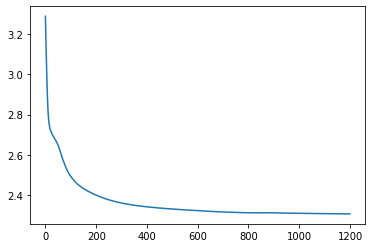

In [174]:
plt.plot(net.training_progress)

In [187]:
chars = ""
ix = 0

for i in range(100):
    xenc = torch.nn.functional.one_hot(torch.tensor(ix), 27).float()
    pred = net(xenc)
    probs = pred.softmax(0)
    ix = random.choices(torch.arange(27), weights=probs)[0]
    chars += lex[ix]
    
chars.split(".")

/var/folders/m7/q114wcy152nc5tqs2955xk0w0000gn/T/ipykernel_72447/2708191300.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = torch.nn.functional.one_hot(torch.tensor(ix), 27).float()


['anyerethan',
 'o',
 'y',
 'emoliel',
 'aurisen',
 'a',
 'cisoria',
 'o',
 'somon',
 'ta',
 '',
 '',
 'akissie',
 'erriorynizokinicari',
 'e',
 'iandan',
 'ees',
 '',
 'cany']